In [1]:
"""
------------------------------------------------------------------------------
libraries
------------------------------------------------------------------------------
"""

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

from sklearn import preprocessing

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.model_selection import train_test_split

from sklearn import linear_model

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.neighbors import KNeighborsRegressor

from sklearn import tree
from sklearn.tree import DecisionTreeRegressor, plot_tree

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import torch
import torch.nn as nn
import torch.optim as optim




### Descriptive statistics and data cleaning

In [2]:
#Data import

df = pd.read_csv("BostonHousing.csv")

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,NaN,36.2


In [3]:
#checking for missing and duplicated values

df.isna().sum()
df.dropna(inplace= True)

In [4]:
df.duplicated().sum()

0

In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,3.690136,11.460660,11.000863,0.068528,0.553215,6.280015,68.932741,3.805268,9.403553,406.431472,18.537563,12.769112,22.359645
std,9.202423,23.954082,6.908364,0.252971,0.113112,0.697985,27.888705,2.098571,8.633451,168.312419,2.166460,7.308430,9.142979
min,0.006320,0.000000,0.460000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.081955,0.000000,5.130000,0.000000,0.453000,5.879250,45.475000,2.110100,4.000000,280.250000,17.400000,7.125000,16.800000
50%,0.268880,0.000000,8.560000,0.000000,0.538000,6.201500,77.700000,3.199200,5.000000,330.000000,19.100000,11.300000,21.050000
75%,3.435973,12.500000,18.100000,0.000000,0.624000,6.605500,94.250000,5.116700,24.000000,666.000000,20.200000,17.117500,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


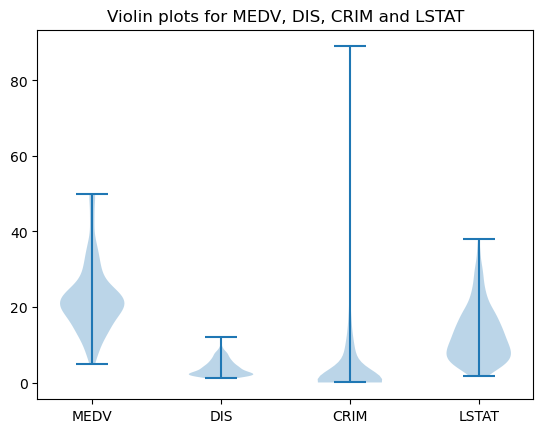

In [6]:
#Violin plots for further illustration of the variables "MEDV", "DIS", "CRIM" and "LSTAT"
positions = [1, 2, 3, 4]
plt.violinplot([df["MEDV"], df["DIS"],df["CRIM"], df["LSTAT"]], positions=positions)
plt.xticks(positions, ["MEDV", "DIS", "CRIM", "LSTAT"])
plt.title("Violin plots for MEDV, DIS, CRIM and LSTAT")
plt.show()


### Correlation

Calculation of the correlation value between the dependent variables and the independent variable:

--> Pearson correlation coefficient
The Pearson coefficient is calculated under the assumption of a normal distribution and a linear relationship between the variables. It is sensitive 
to outliers and requires a linear relationship to provide accurate results.

The correlation coefficient measures a linear relationship relationship from -1 (negative linear relationship) to 1 (positive linear relationship), with 0 indicating a
lack of linear correlation.

If the requirement of normal distribution is not met, the rank correlation coefficient can be used as an alternative. 

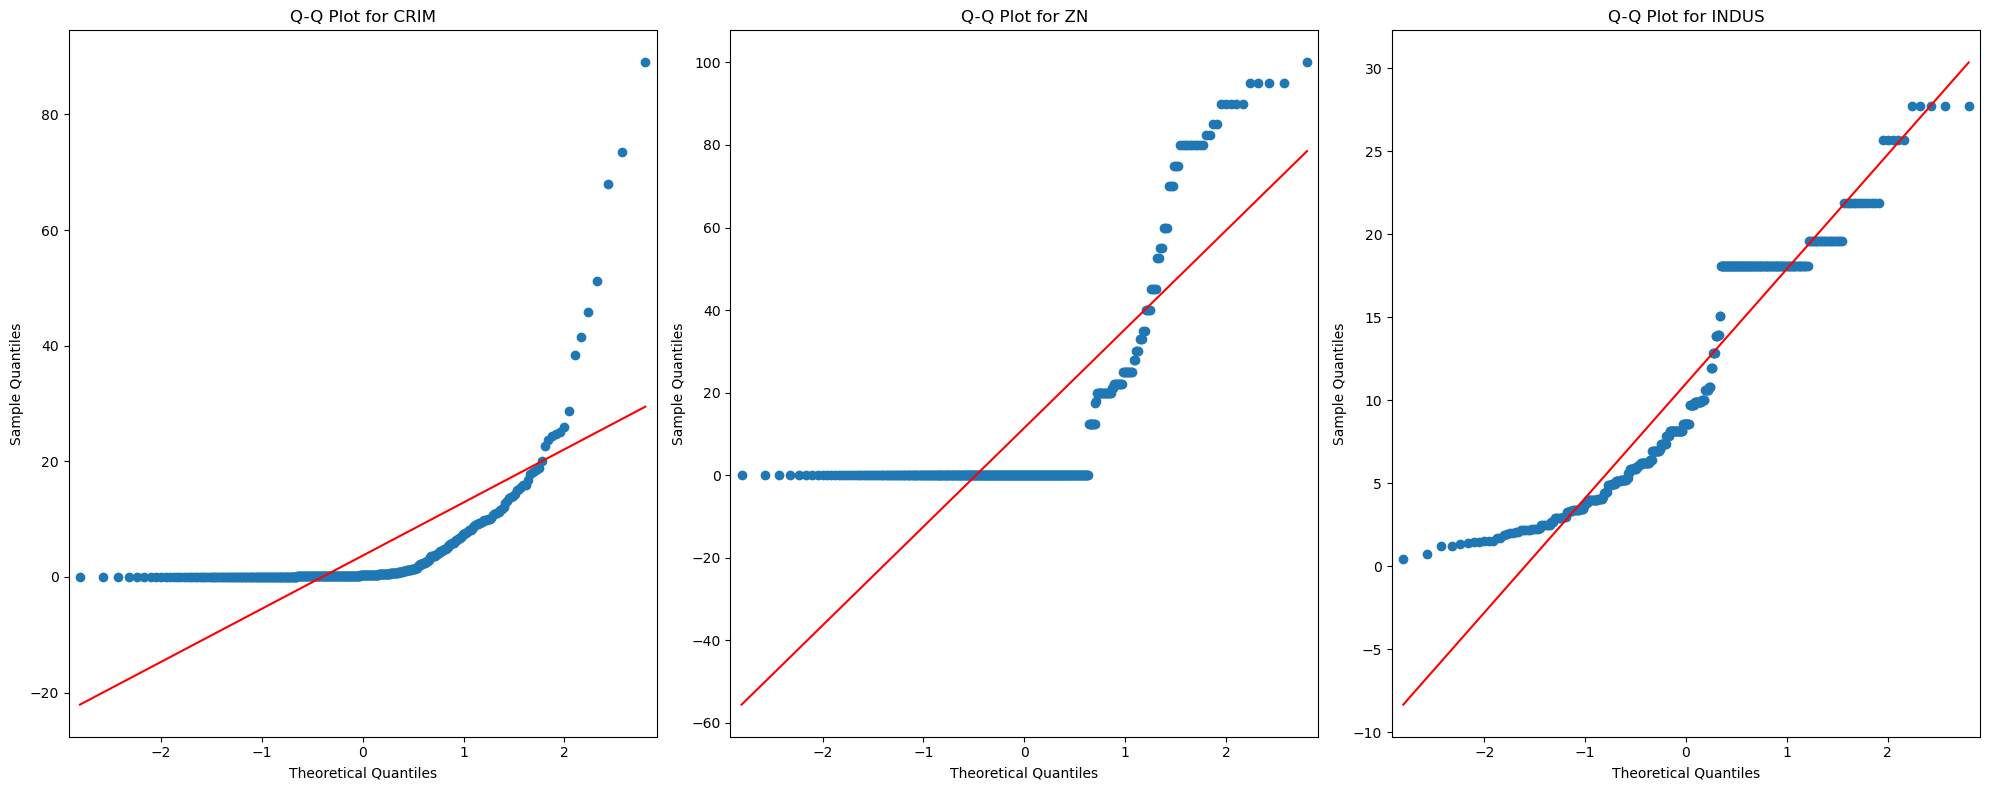

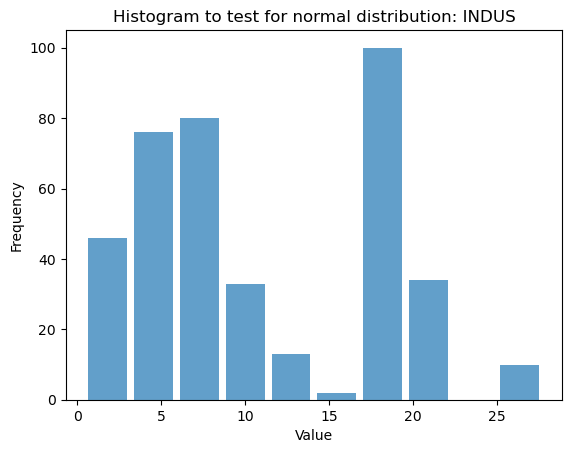

In [7]:
#Testing for normal distribution

#Q-Q-Plot: CRIM, ZN, INDUS
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 8))

#Iterate through the columns and create Q-Q plots
for i, column in enumerate(["CRIM", "ZN", "INDUS"]):
    sm.qqplot(df[column], line="s", ax=axes[i])
    axes[i].set_title(f"Q-Q Plot for {column}")

plt.tight_layout()
plt.show()

#Histogram for further analysis of the INDUS variable
plt.hist(df["INDUS"], bins="auto", alpha=0.7, rwidth=0.85)
plt.title("Histogram to test for normal distribution: INDUS")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

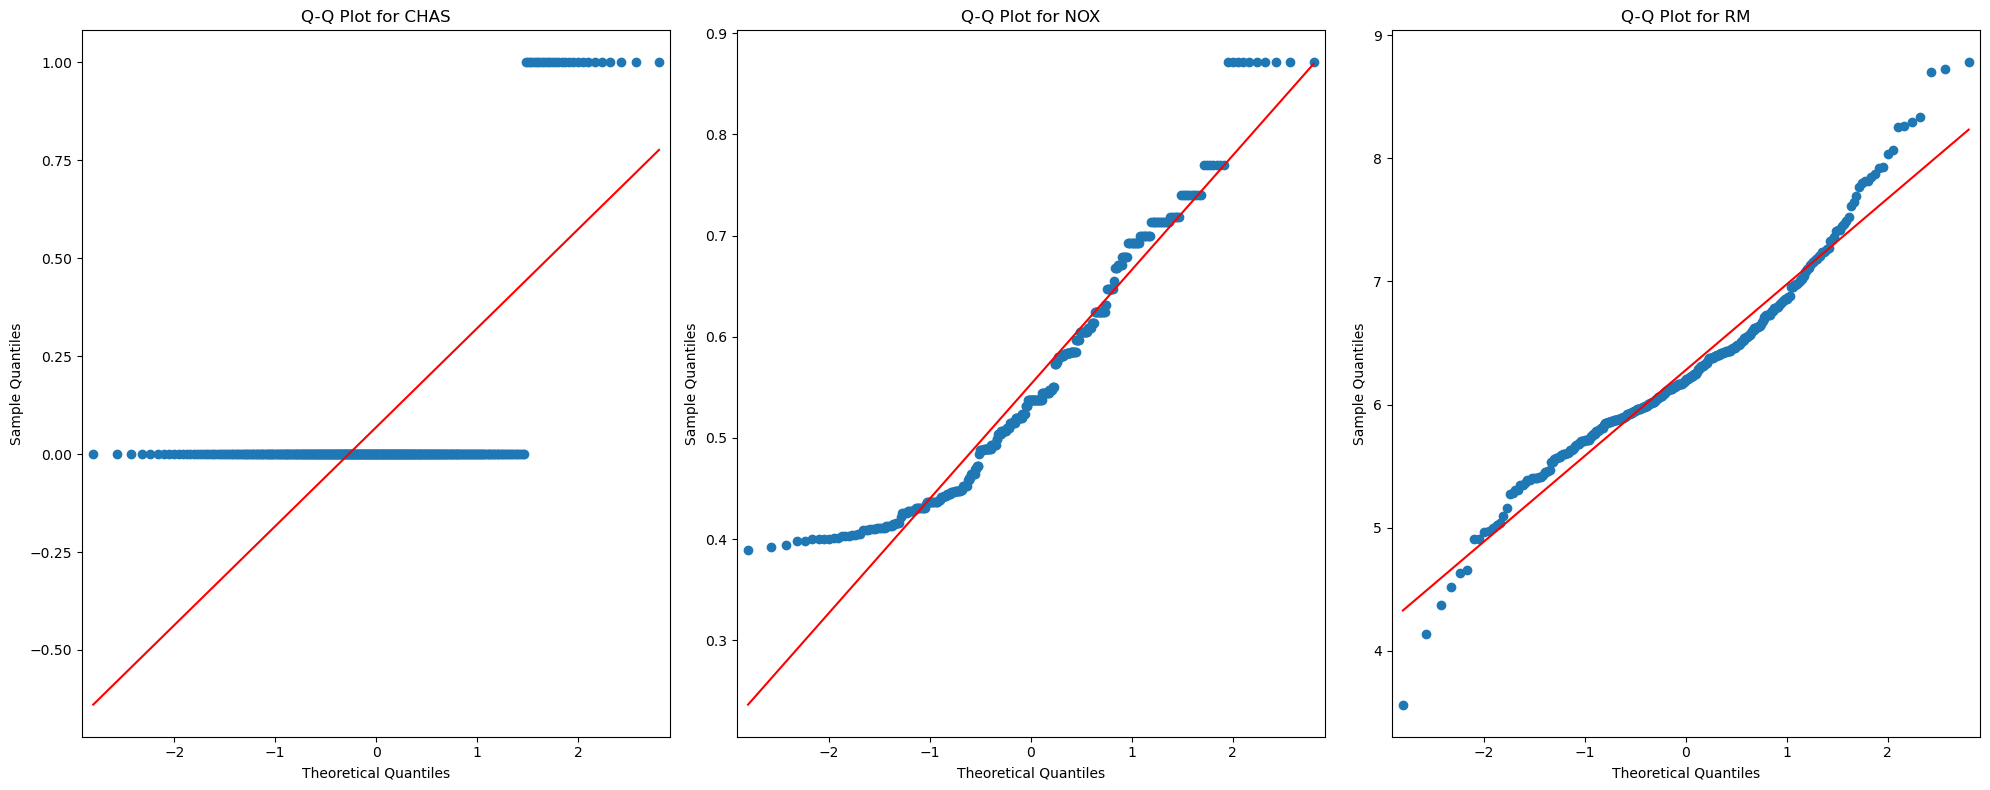

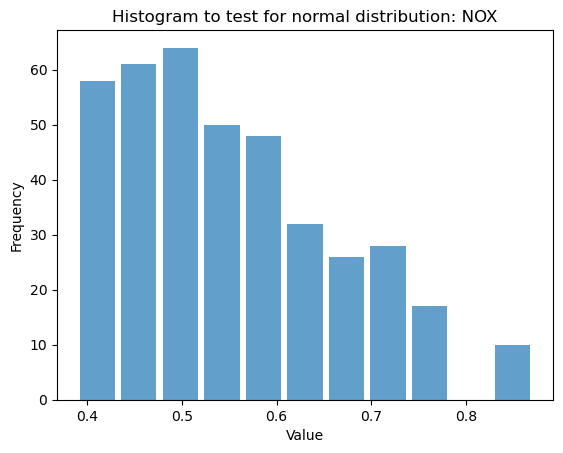

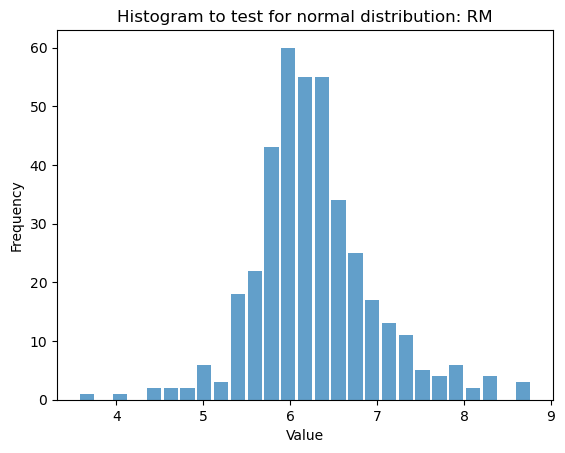

In [8]:
#Q-Q-Plot: CHAS, NOX, RM
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 8))

#Iterate through the columns and create Q-Q plots
for i, column in enumerate(["CHAS", "NOX", "RM"]):
    sm.qqplot(df[column], line="s", ax=axes[i])
    axes[i].set_title(f"Q-Q Plot for {column}")

plt.tight_layout()
plt.show()

#Histogram for further analysis of the NOX variable
plt.hist(df["NOX"], bins="auto", alpha=0.7, rwidth=0.85)
plt.title("Histogram to test for normal distribution: NOX")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

#Histogram for further analysis of the RM variable
plt.hist(df["RM"], bins="auto", alpha=0.7, rwidth=0.85)
plt.title("Histogram to test for normal distribution: RM")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

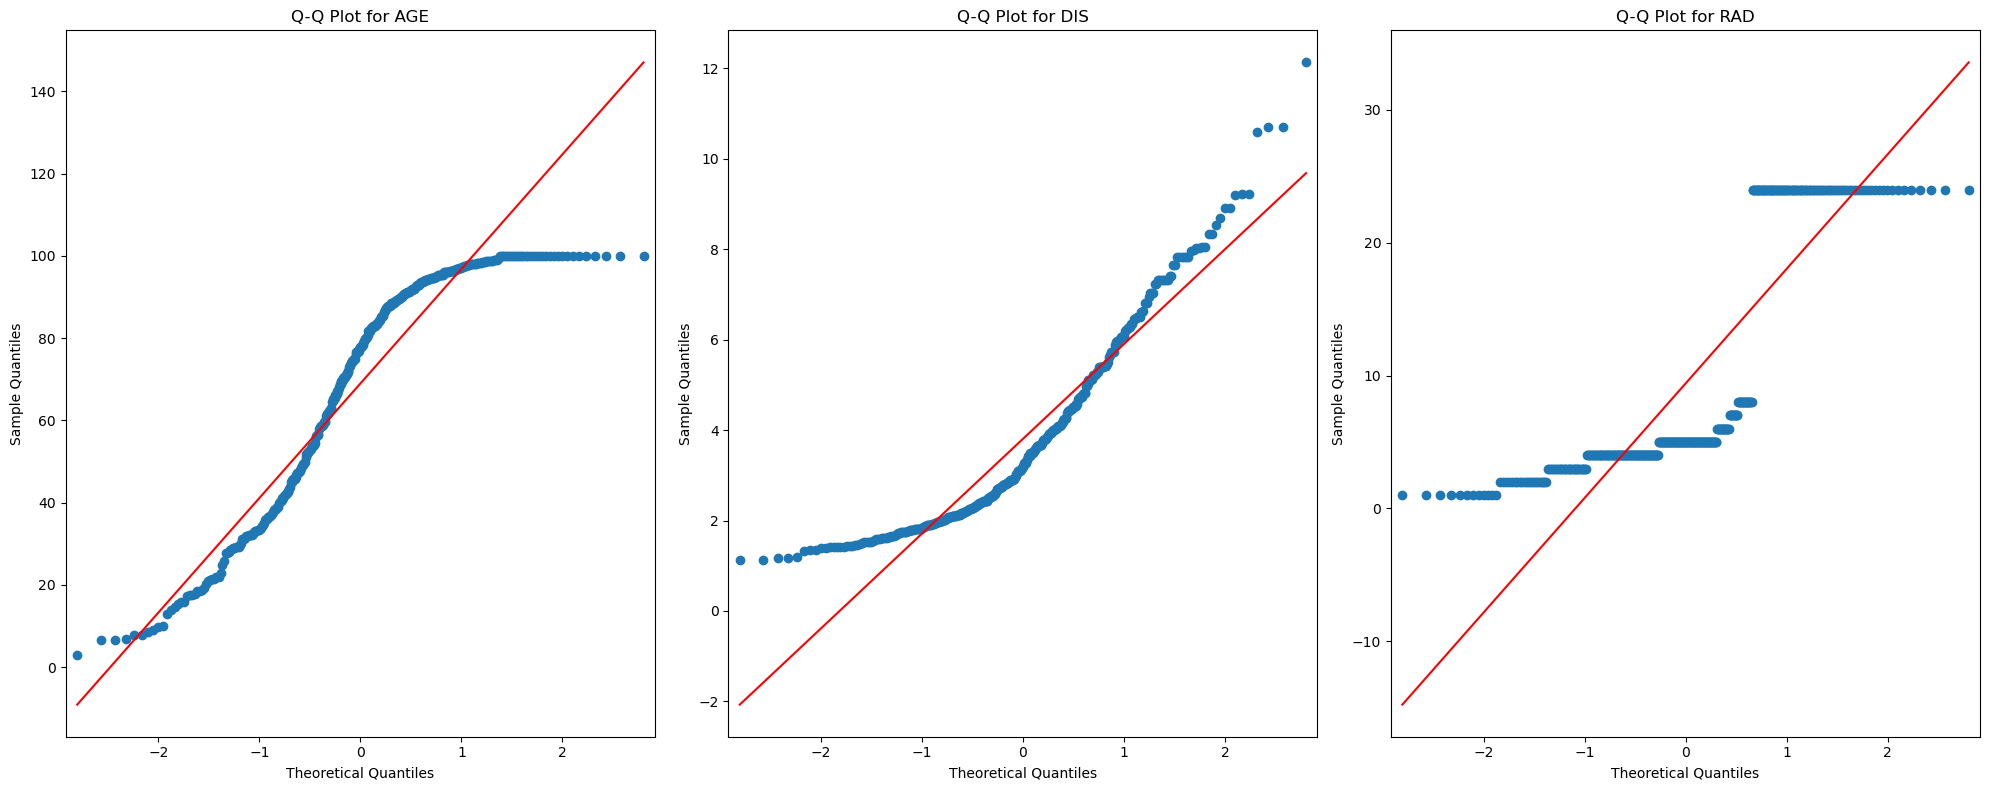

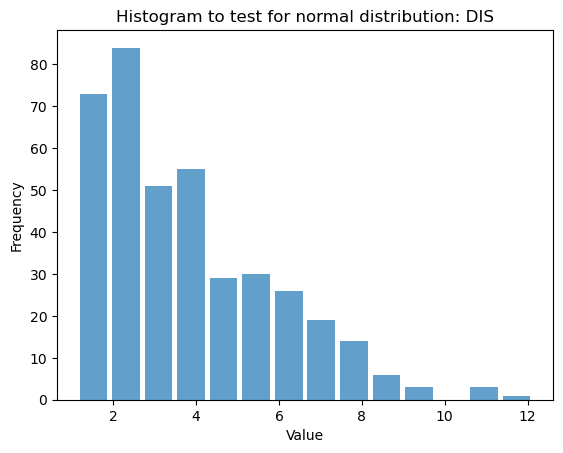

In [9]:
#Q-Q-Plot: AGE, DIS, RAD
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 8))

# Iterate through the columns and create Q-Q plots
for i, column in enumerate(["AGE", "DIS", "RAD"]):
    sm.qqplot(df[column], line="s", ax=axes[i])
    axes[i].set_title(f"Q-Q Plot for {column}")

plt.tight_layout()
plt.show()

#Histogram for further analysis of the DIS variable
plt.hist(df["DIS"], bins="auto", alpha=0.7, rwidth=0.85)
plt.title("Histogram to test for normal distribution: DIS")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

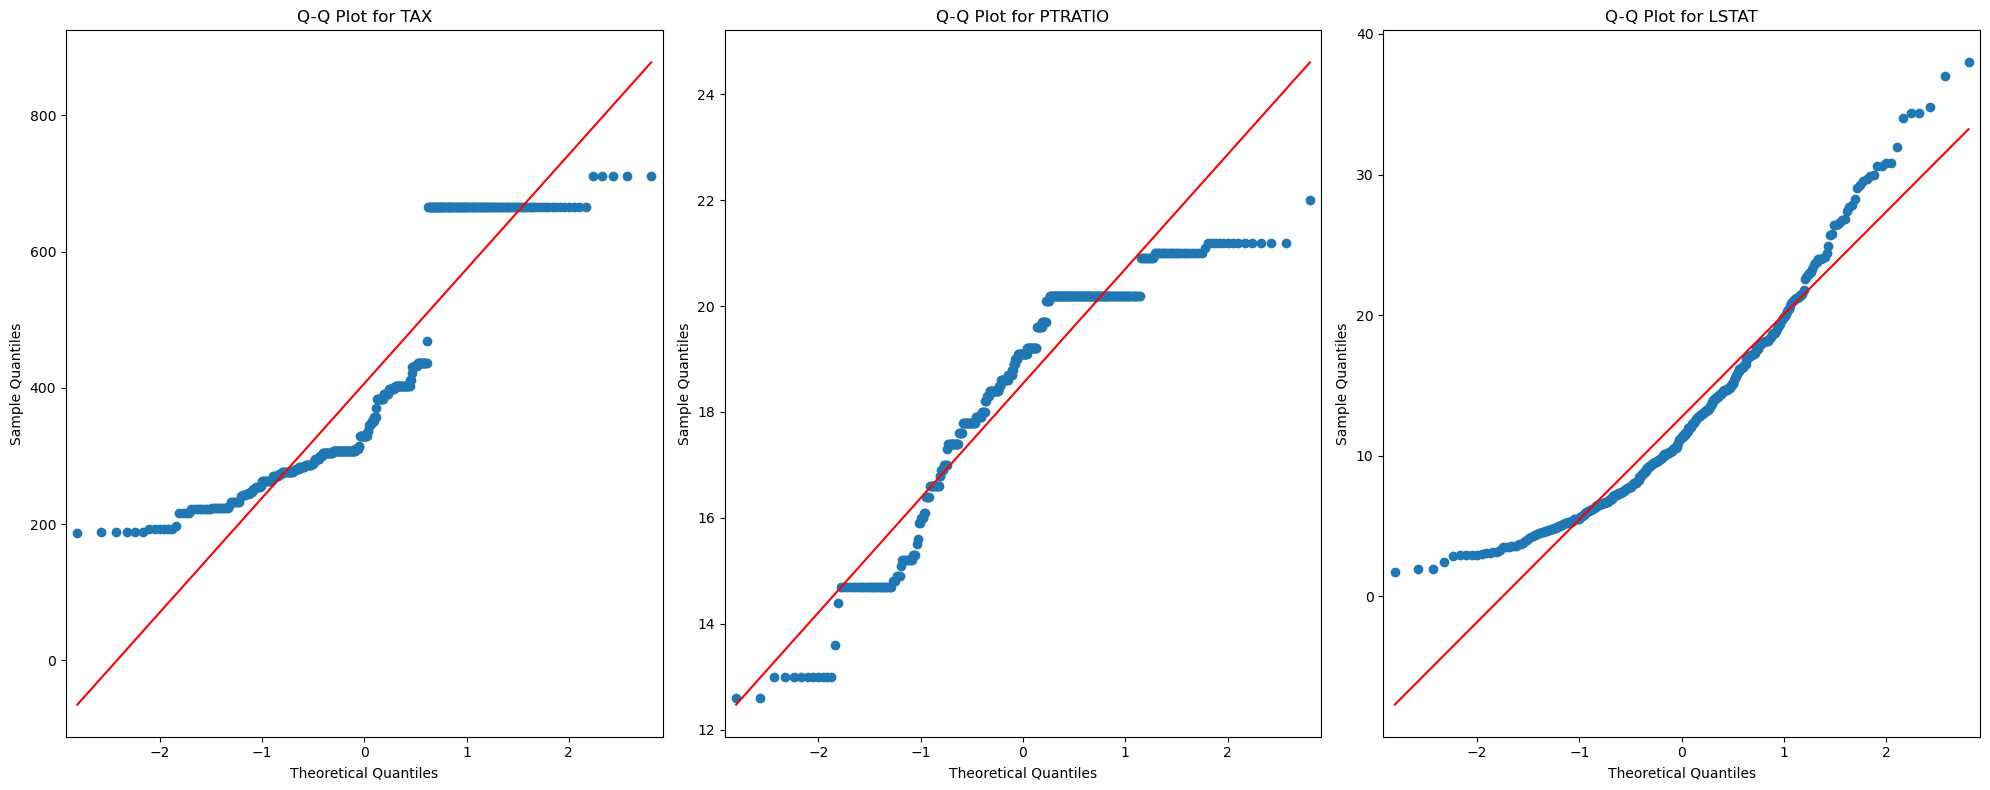

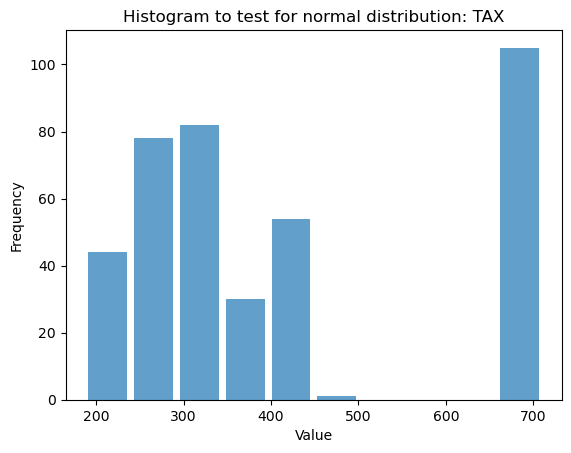

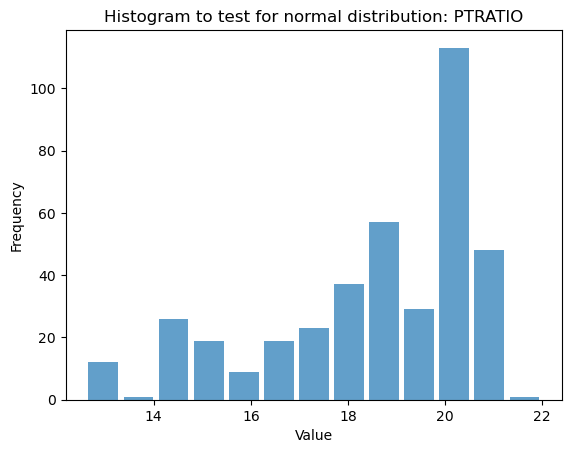

In [10]:
#Q-Q-Plot: TAX, PTRATIO, LSTAT
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 8))

# Iterate through the columns and create Q-Q plots
for i, column in enumerate(["TAX", "PTRATIO", "LSTAT"]):
    sm.qqplot(df[column], line="s", ax=axes[i])
    axes[i].set_title(f"Q-Q Plot for {column}")

plt.tight_layout()
plt.show()

#Histogram for further analysis of the TAX variable
plt.hist(df["TAX"], bins="auto", alpha=0.7, rwidth=0.85)
plt.title("Histogram to test for normal distribution: TAX")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

#Histogram for further analysis of the PTRATIO variable
plt.hist(df["PTRATIO"], bins="auto", alpha=0.7, rwidth=0.85)
plt.title("Histogram to test for normal distribution: PTRATIO")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()


<Figure size 800x800 with 0 Axes>

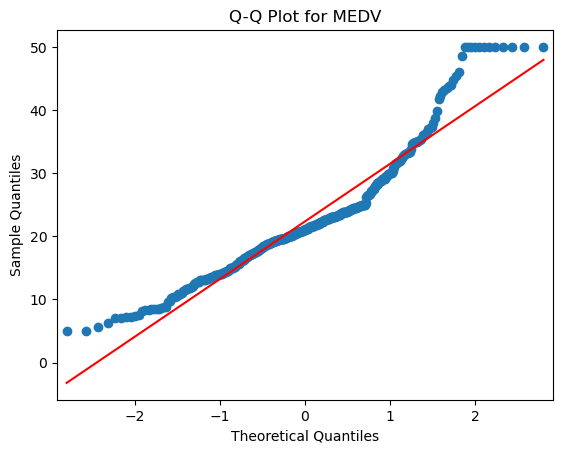

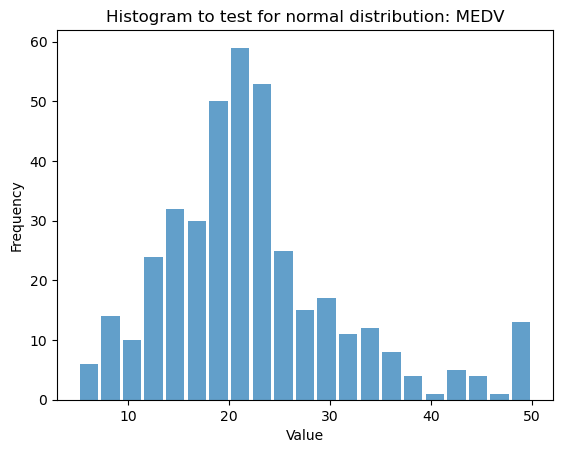

In [11]:
#Q-Q-Plot: MEDV
fig = plt.figure(figsize=(8, 8))

# Iterate through the columns and create Q-Q plots
sm.qqplot(df["MEDV"], line="s")
plt.title(f"Q-Q Plot for MEDV")

plt.show()

#Histogram for further analysis of the MEDV variable
plt.hist(df["MEDV"], bins="auto", alpha=0.7, rwidth=0.85)
plt.title("Histogram to test for normal distribution: MEDV")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

### Result: no approximate ND

There seems to be no approximate normal distribution for all variables, except maybe RM and MEDV.
Rank correlation coefficients will be examined, because of the deviation from normality in most of the variables.

--> Rank correlation coefficient (Spearman or Kendall)

The (Spearman) rank correlation coefficient evaluates the strength and direction of a monotonic relationship between variables, and its values lie
between -1 (negative relationship) and 1 (positove relationship), while 0 indicates a lack of correlation.

In contrast to the Spearman correlation coefficient, the Kendall tau only uses the difference in the ranks. 
Usually the value is slightly smaller than the value of the Spearman method.


In [12]:
#Spearman
cor_spearman = df.corr(method = "spearman")

cor_1 = cor_spearman["MEDV"].sort_values(ascending=False)

print(cor_1)

MEDV       1.000000
RM         0.651655
ZN         0.463929
DIS        0.462315
CHAS       0.144725
RAD       -0.372972
AGE       -0.575235
NOX       -0.582439
PTRATIO   -0.586602
CRIM      -0.591338
INDUS     -0.599116
TAX       -0.599458
LSTAT     -0.859834
Name: MEDV, dtype: float64


In [13]:
#Kendall
cor_kendall = df.corr(method = "kendall")

cor_2 = cor_kendall["MEDV"].sort_values(ascending=False)

print(cor_2)


MEDV       1.000000
RM         0.495867
ZN         0.360393
DIS        0.326592
CHAS       0.118590
RAD       -0.268763
AGE       -0.405382
NOX       -0.415753
PTRATIO   -0.423073
CRIM      -0.428290
INDUS     -0.434693
TAX       -0.442721
LSTAT     -0.674377
Name: MEDV, dtype: float64


The Spearman and Kendall correlation methods have similar results.
The largest positive correlation exists between the median value of private houses (MEDV) and the average number of rooms per apartment (RM). In contrast, a high percentage of low-status residents (LSTAT) correlates most negatively with the value.
A higher proportion of residential lots for parcels over 25,000 square feet (ZN) correlates positively with MEDV, while the proportion of older houses built before 1940 (AGE), the student-teacher ratio (PTRATIO), the crime rate (CRIM), the proportion of non-retail business acres per town (INDUS), and property taxes (TAX) show a similar negative correlation with the median value (MEDV).

### Scatter plots
Relationship between the three variables (RM, LSTAT, CRIM) and their impact on the median value of owner-occupied homes (MEDV)


- RM: average number of rooms per dwelling
- LSTAT: % lower status of the population
- CRIM: per capita crime rate by town

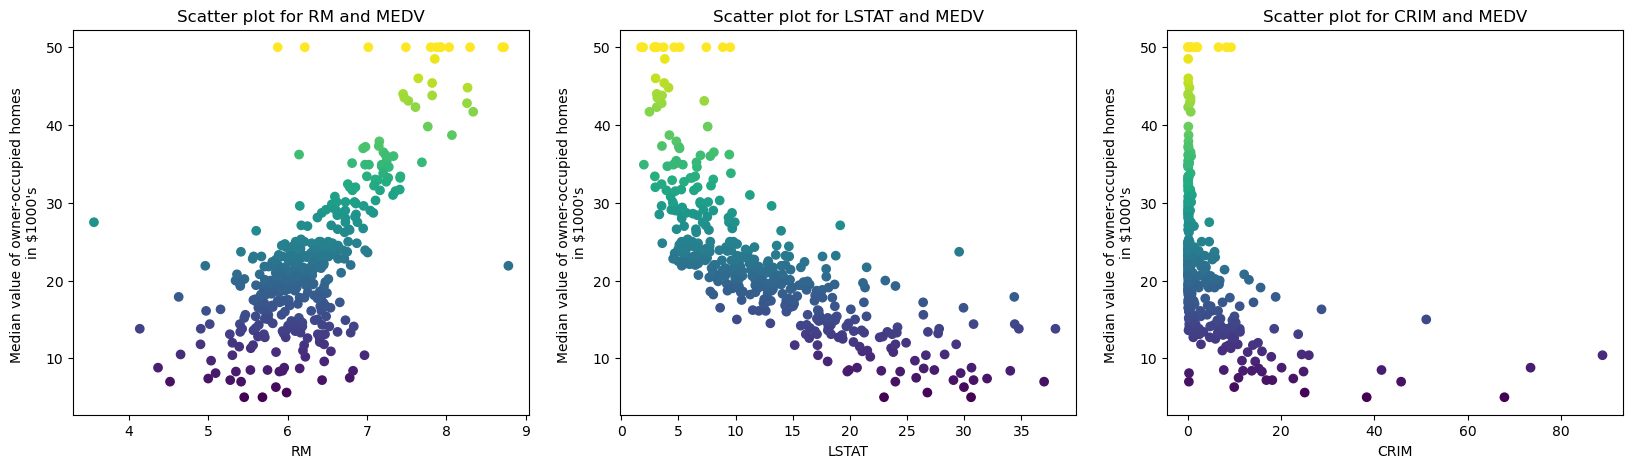

In [14]:
#Scatter plots with Matplotlib
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

for i, column in enumerate(["RM", "LSTAT", "CRIM"]):
    axes[i].scatter(df[column], df["MEDV"],  c= df["MEDV"], cmap="viridis", marker="o")
    axes[i].set_xlabel(f"{column}")
    axes[i].set_ylabel("Median value of owner-occupied homes \nin $1000's")
    axes[i].set_title(f"Scatter plot for {column} and MEDV")



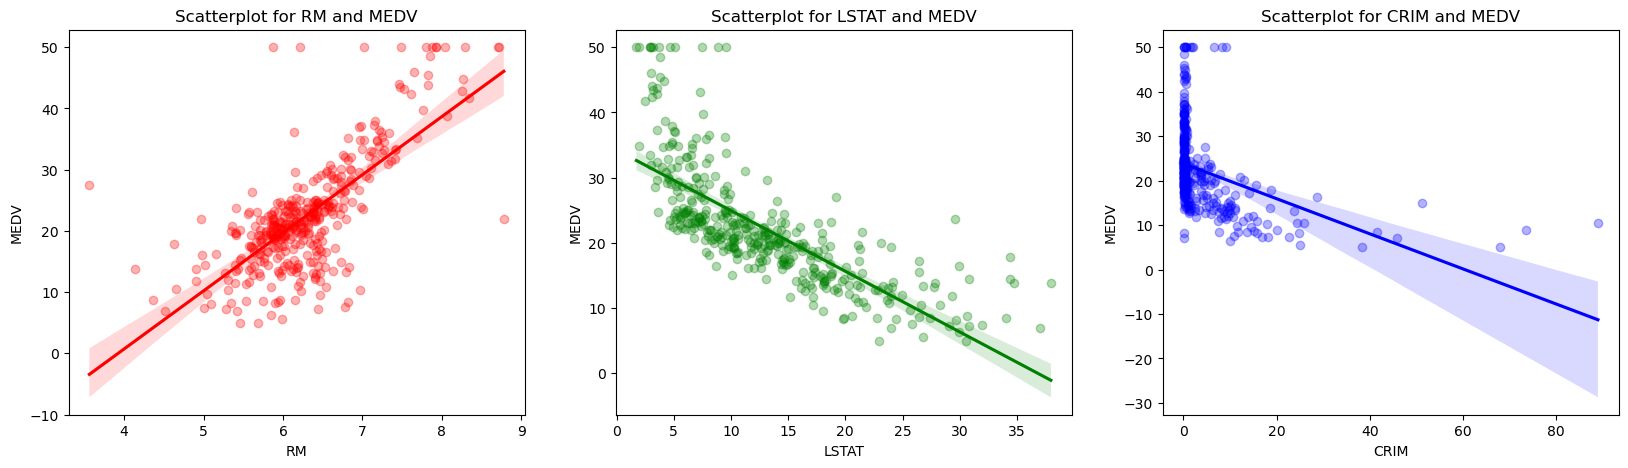

In [15]:
#Scatter plots and regression line with seaborn (just for fun and to check out seaborn)
columns = ["RM", "LSTAT", "CRIM"]
y = "MEDV"

fig, axs = plt.subplots(nrows = 1, ncols=3, figsize=(20, 5))
colors = ["red", "green", "blue"]

for i, (column, color) in enumerate(zip(columns, colors)):
    sns.regplot(x=df[column], y=df[y], ax=axs[i], scatter_kws={"alpha": 0.3}, color = color)
    axs[i].set_title(f"Scatterplot for {column} and {y}")

plt.show()


As with the correlation coefficients, the diagrams confirm a negative correlation between MEDV and LSTAT and CRIM, whereas the average number of rooms 
per dwelling tends to have a positive effect on MEDV.

### Clustering

Clustering - Unsupervised learning

Cluster of Boston's neighborhoods in terms of economic status & accessibility (CRIM, LSTAT and DIS) using the K-Means clustering algorithm.

In [16]:
#preparation od the data

x = df["CRIM"].tolist()
y = df["LSTAT"].tolist()
z = df["DIS"].tolist()

data = list(zip(x, y, z))


### Silhouette coefficient

The silhouette coefficient is calculated from the difference between the average distance of a data point to the data points in the nearest cluster (b) and the average distance to the data points in its own cluster (a), divided by the maximum of a and b. The value of the silhouette coefficient lies between -1 and 1.

- A value close to 1 indicates that the data point is well-clustered, meaning it is far away from the neighboring clusters compared to its own cluster.
- A value close to 0 indicates that the data point is on or very close to the decision boundary between two neighboring clusters.
- A value close to -1 indicates poor cluster quality.

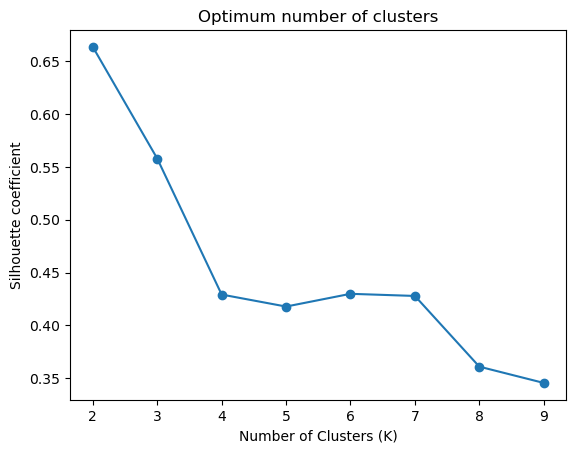

In [17]:
silhouette_coefficients = []

# Testing the values for K (e.g. from 2 to 10)
for i in range(2, 10):
    km = KMeans(n_clusters=i, n_init = 10)
    km.fit(data)
    score = silhouette_score(data, km.labels_)
    silhouette_coefficients.append(score)

# Silhouette values in relation to K
plt.plot(range(2, 10), silhouette_coefficients, marker="o")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette coefficient")
plt.title("Optimum number of clusters")
plt.show()

### Elbow-Method: Inertia-Value
The elbow method can be examined in addition to the silhouette coefficient to determine the optimum number of clusters (k). The sum of the squared distances (inertia) is calculated for different values of k and plotted against k. The elbow point in the curve shows the optimum number of clusters.

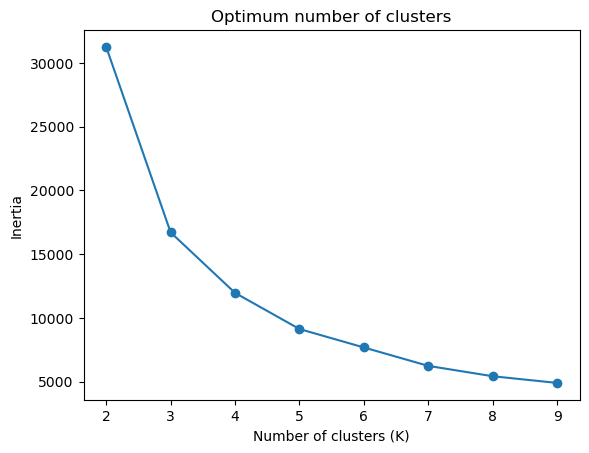

In [18]:
# List for saving the inertia values
inertia_values = []

# Testing the values for K (e.g. from 2 to 10)
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k,n_init= 10, random_state=42)
    kmeans.fit(data)
    inertia_values.append(kmeans.inertia_)

# Plot of the inertia values in relation to K
plt.plot(range(2, 10), inertia_values, marker="o")
plt.xlabel("Number of clusters (K)")
plt.ylabel("Inertia")
plt.title("Optimum number of clusters")
plt.show()

After investigateing the silhouette coefficient and elbow point k=3 seems to be the optimum number of clusters.
The data will be divided into three clusters according to the variables DIS, CRIM and LSTAT.

In [19]:
#K-means-object
#k = 3
kmeans3 = KMeans(n_clusters= 3, n_init=10, random_state=42)

kmeans3.fit(data)


KMeans(n_clusters=3, n_init=10, random_state=42)

### 2-D Scatter plots
Data points with assigned cluster within three three 2-D scatter plots (CRIM & LSTAT, LSTAT & DIS, DIS & CRIM):

Text(0, 0.5, '% lower status of the population')

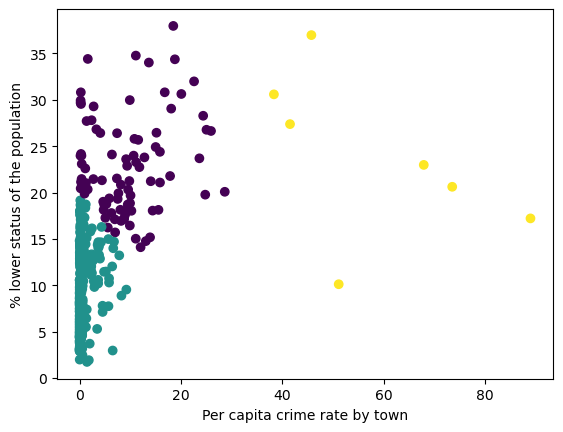

In [20]:
#CRIM & LSTAT
plt.scatter(x,y, c= kmeans3.labels_)
plt.xlabel("Per capita crime rate by town")
plt.ylabel("% lower status of the population")


The first scatterplot shows the relationship between the proportion of the population with low status and the crime rate per capita. One cluster is characterized by a relatively low crime rate (up to approx. 10%) and a relatively low proportion of the population with low status (2-20%). This is followed by a cluster in which both or one of the two values is higher and is somewhat more diversified overall. The third cluster consists of 7 data points and is characterized by a high crime rate (approx. 38-95%) and mostly low status.

Text(0, 0.5, 'Weighted distances to five \nBoston employment centres')

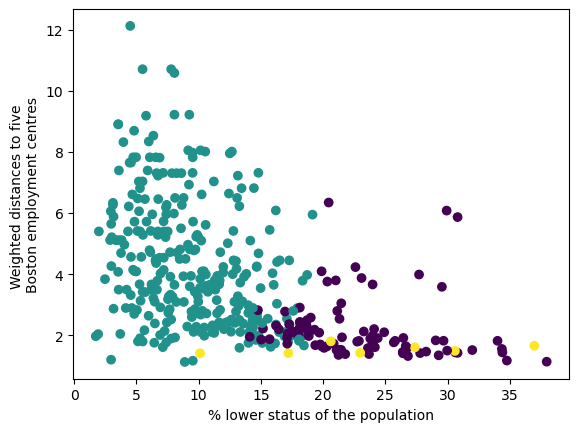

In [21]:
#LSTAT & DIS
plt.scatter(y,z, c= kmeans3.labels_)
plt.xlabel("% lower status of the population")
plt.ylabel("Weighted distances to five \nBoston employment centres")


The second scatterplot shows the relationship between the proportion of the population with low status and the weighted distance to five Boston employment centers.

 The cluster with the 7 data points is characterized by a consistently low distance to employment centers, but the proportion of low-status population ranges from approximately 10% to 37%. The cluster with the lowest overall crime rate and relatively low proportion of low status is widely distributed near the employment centers as well as far away.The middle cluster is mostly located near of the employment centers, but also sometimes at a medium distance.

Text(0, 0.5, 'Per capita crime rate by town')

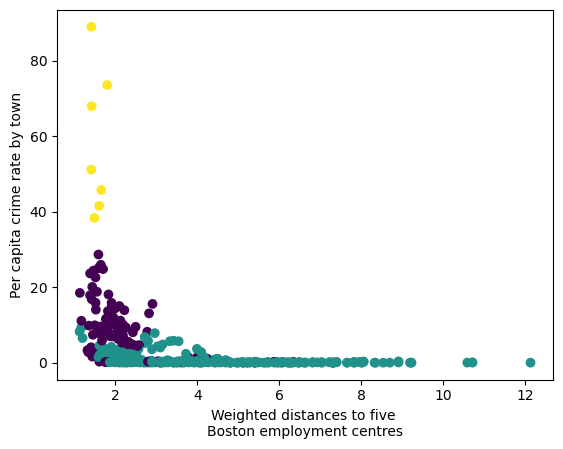

In [22]:
#DIS & CRIM
plt.scatter(z,x, c= kmeans3.labels_)
plt.xlabel("Weighted distances to five \nBoston employment centres")
plt.ylabel("Per capita crime rate by town")


This scatterplot shows the relationship between the weighted distance to employment centers and the crime rate per capita.
In one cluster, the crime rate is consistently low, with the distance to employment centers varying greatly, from near to far. The other two clusters are significantly closer to employment centers and have a higher average crime rate in comparison. The cluster with the 7 data points again stands out here and has the highest crime rate and is located in the immediate vicinity of the employment centers.

In [23]:
#Number of data points per Cluster 
cluster_labels = kmeans3.labels_


unique_labels, counts = np.unique(cluster_labels, return_counts=True)

for label, count in zip(unique_labels, counts):
    print(f"Cluster {label}: Number of data points = {count}")



Cluster 0: Number of data points = 87
Cluster 1: Number of data points = 300
Cluster 2: Number of data points = 7


In [24]:
df["Cluster"] = kmeans3.labels_

df.head(20)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,Cluster
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,1
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,1
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21,28.7,1
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5,311,15.2,19.15,27.1,1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5,311,15.2,29.93,16.5,0
10,0.22489,12.5,7.87,0.0,0.524,6.377,94.3,6.3467,5,311,15.2,20.45,15.0,0
11,0.11747,12.5,7.87,0.0,0.524,6.009,82.9,6.2267,5,311,15.2,13.27,18.9,1
12,0.09378,12.5,7.87,0.0,0.524,5.889,39.0,5.4509,5,311,15.2,15.71,21.7,1


Text(0.5, 0, 'DIS')

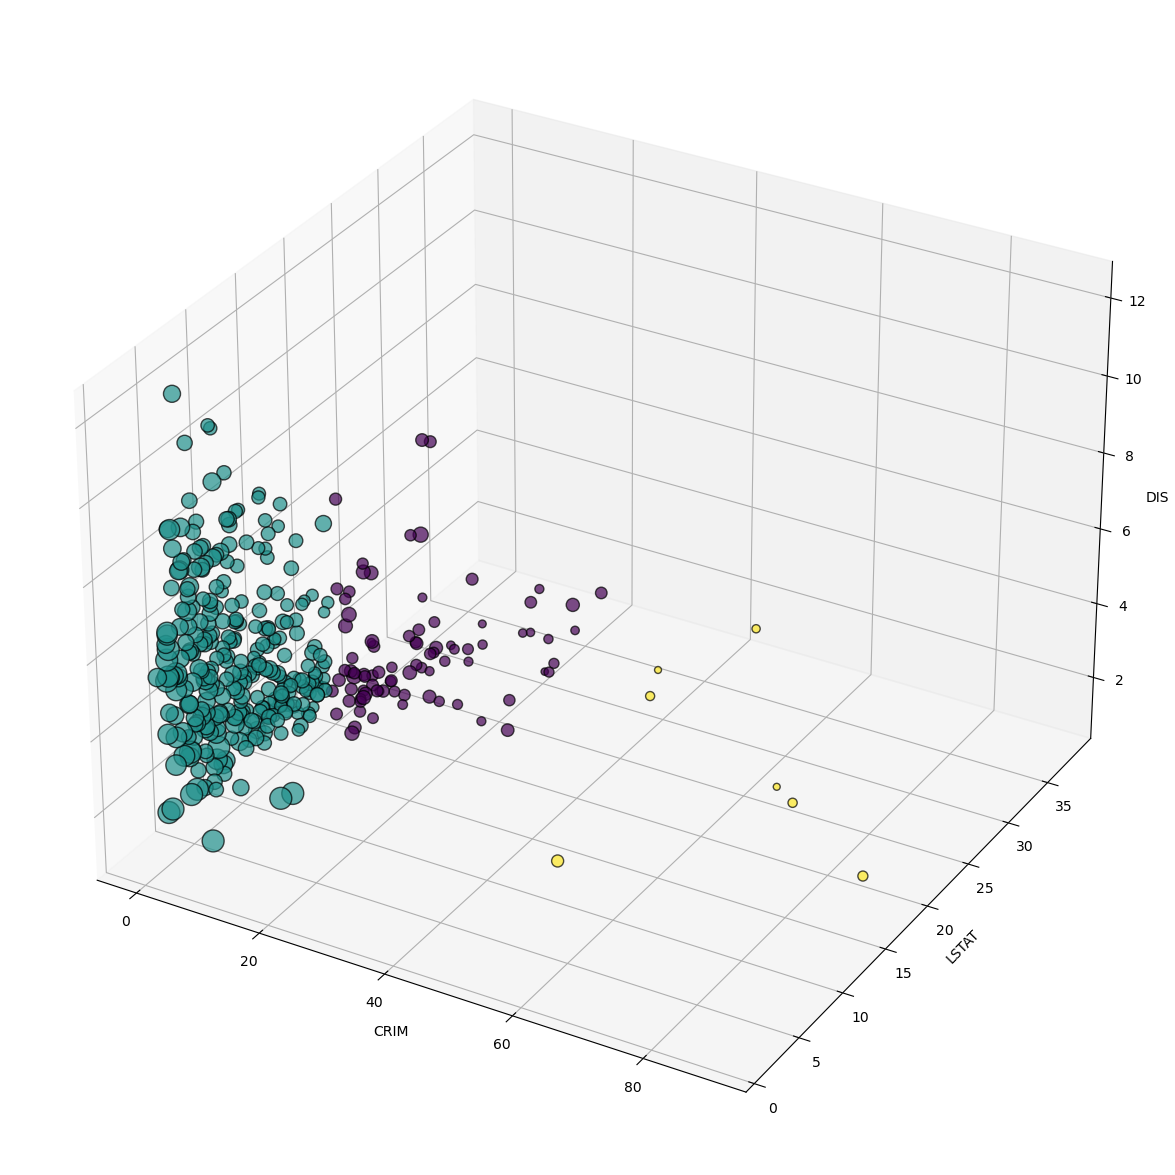

In [25]:
#3D Plot
fig = plt.figure(figsize=(15, 15))
ax = plt.axes(projection = "3d")

ax.scatter3D(x, y, z, c = kmeans3.labels_, s = df["MEDV"]*5,  alpha = 0.7, edgecolor= "black")
ax.set_xlabel("CRIM")
ax.set_ylabel("LSTAT")
ax.set_zlabel("DIS")

### Prediction models
- preparing the data by scaling and splitting into training and test data

In [26]:
#Min-Max-Scaling
min_max_scaler = preprocessing.MinMaxScaler()
scaled_data = min_max_scaler.fit_transform(df)


#Conversion of the NumPy array into a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)
print(scaled_df)

         CRIM    ZN     INDUS  CHAS       NOX        RM       AGE       DIS  \
0    0.000000  0.18  0.067815   0.0  0.309129  0.577505  0.641607  0.269203   
1    0.000236  0.00  0.242302   0.0  0.165975  0.547998  0.782698  0.348962   
2    0.000236  0.00  0.242302   0.0  0.165975  0.694386  0.599382  0.348962   
3    0.000293  0.00  0.063050   0.0  0.143154  0.658555  0.441813  0.448545   
4    0.000264  0.00  0.063050   0.0  0.143154  0.549722  0.574665  0.448545   
..        ...   ...       ...   ...       ...       ...       ...       ...   
389  0.001928  0.00  0.338343   0.0  0.406639  0.384748  0.727085  0.115514   
390  0.002451  0.00  0.338343   0.0  0.406639  0.472504  0.790937  0.124453   
391  0.000438  0.00  0.420455   0.0  0.381743  0.490324  0.760041  0.105293   
392  0.000612  0.00  0.420455   0.0  0.381743  0.654340  0.907312  0.094381   
393  0.001161  0.00  0.420455   0.0  0.381743  0.619467  0.889804  0.114514   

          RAD       TAX   PTRATIO     LSTAT      ME

In [27]:
#Division of the data set into training and test data
#features= input data/predictors
#target = target variable/ dependent variable

features = scaled_df[["LSTAT", "RM", "DIS"]]
target = scaled_df["MEDV"]

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


### Supervised learning models
- Multiple Linear Regression
- K-Nearest Neighbors
- Decision Tree

### Multiple linear regression

In [28]:

#Prediction of MEDV with the training data using multiple linear regression

regr = linear_model.LinearRegression()

regr.fit(X_train, y_train)
y_predict = regr.predict(X_test)

#Evaluation of the performance
mse = mean_squared_error(y_test, y_predict)
print("Mean squared error: ", mse)

r2 = r2_score(y_test, y_predict)
print("R²:", r2)

print("Regression coefficients -> \nChange in MEDV with increase in LSTAT/RM/DIS \nby 1 unit: ", regr.coef_)

Mean squared error:  0.018198038881035886
R²: 0.5630991043919185
Regression coefficients -> 
Change in MEDV with increase in LSTAT/RM/DIS 
by 1 unit:  [-0.50965825  0.59985805 -0.04213567]


### K-Nearest Neighbors
- Euclidean distance, n_neighbors = 5, algorithm = ball-tree

The ball tree algorithm always divides the data points into 2 clusters, i.e. it belongs to the category of binary trees (because each node has a maximum of two children). If you imagine the data points in a coordinate system, then each of the clusters is surrounded by a circle (in the 2-dimensional case), a sphere (in the 3-dimensional case) or a hyper-sphere (in the n-dimensional case). 

As this is a regression task and a continuous, numerical target variable is to be predicted, the KNeighbors regressor
is used.

In [29]:
#knn_data = "LSTAT", "RM", "DIS"
#classes = "MEDV"

knn_regressor = KNeighborsRegressor(n_neighbors=5, algorithm= "ball_tree", p = 2)
knn_regressor.fit(X_train, y_train)


#Evaluation of the performance
y_pred = knn_regressor.predict(X_test)

# Evaluation of the performance with the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

r2 = r2_score(y_test, y_pred)
print("R²:", r2)



Mean Squared Error: 0.015236478199718708
R²: 0.6342006402510123


### Decision tree, depth = 3

Since this is a regression with a continuous, numerical target variable to be predicted, the DecisionTreeRegressor is used.

In [30]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

#Feature column
feature_names = ["LSTAT", "RM", "DIS"]
#X = "LSTAT", "RM", "DIS"
#y = "MEDV"

#Decision tree, depth = 3
dt_regressor = DecisionTreeRegressor(max_depth=3)

#model training
dt_regressor.fit(X_train, y_train)

#Evaluation of the performance with X_test and y_predict
y_pred = dt_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean squared error: ", mse)

r2 = r2_score(y_test, y_pred)
print("R²:", r2)


Mean squared error:  0.016392630649671953
R²: 0.6064435811444708


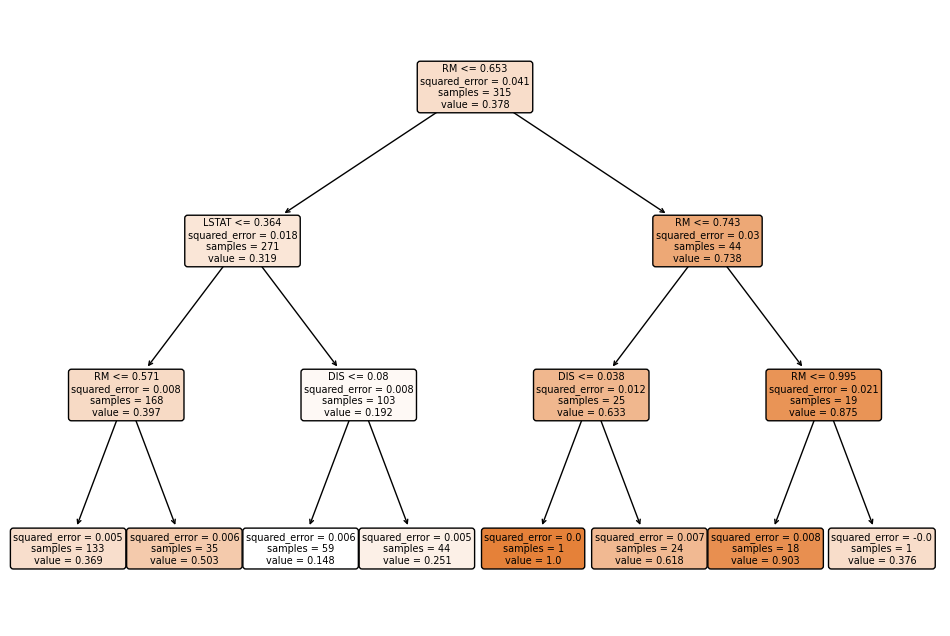

In [31]:
plt.figure(figsize=(12, 8))
plot_tree(dt_regressor, filled=True, feature_names= feature_names, rounded=True)
plt.show()


The division of the data follows the feature that enables the best separation of the data. This is done by selecting the feature and threshold that provide the greatest purity or information gain. In this example, we first split by average number of rooms per apartment. This appears to be the feature with the greatest influence on the MEDV followed by LSTAT and lastly DIS.

### Unsupervised learning model: Feedforward Neural Network
- Adam Optimizer
- ReLU activation function
- three layers (Input, Hidden, Output)
- Loss function MSE
- training 100 epochs 

In [32]:
#Division of the data set into training and test data
#features= input data/predictors
#target = target variable/ dependent variable


inputs = torch.tensor(X_train.values, dtype=torch.float32)
labels = torch.tensor(y_train.values, dtype=torch.float32).reshape(-1, 1)


train_size = int(0.8 * len(inputs))
test_size = len(inputs) - train_size


#The NN_ReLU class inherits properties from nn.Module
class Net(nn.Module):
    def __init__(self, input_size, output_size):
        #super()-methode executes the heritage
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, 300)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(300, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x
    


#Hyperparameter
input_size = 3 #Number of features/dependent variables, LSTAT/RM/DIS
output_size = 1 #one neuron for the result MEDV
learning_rate = 0.0001
num_epochs = 100

#Initializing the neural network
model = Net(input_size, output_size)


#loss function and optimization
lossFunc = nn.MSELoss()  # Mean Squared Error 
optimizer = optim.Adam(model.parameters(), lr= learning_rate)

# Training of the neural network
for epoch in range(num_epochs):
    for idx, element in enumerate(inputs):

        # forward propagation
        outputs = model(element)
        loss = lossFunc(outputs, labels[idx])

        # Backpropagation and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        #if epoch % 10 ==0:
            #loss_value = loss.item()
            #current = idx * len(inputs)
            #print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {loss_value}, Batch: {current}/{len(inputs)}")



predicted_labels = [output.item() for output in model(inputs)]
mse = mean_squared_error(labels, predicted_labels)
print(f"Mean Squared Error: {mse}")

r2 = r2_score(labels, predicted_labels)
print("R²:", r2)


Mean Squared Error: 0.005914524993873891
R²: 0.8547738609182316


### Comparison of the models 
Which model seems to be best suited for prediction?

Supervised learning models
- Multiple lineare regression
MSE:  0.018198038881035886
R²: 0.5630991043919185

- K-Nearest neighbors
MSE: 0.015236478199718708
R²: 0.6342006402510123

- Decision tree
MSE:  0.016392630649671957
R²: 0.6064435811444708

Unsupervised learning models
- Feedforward-Neural-Network
MSE: 0.00595912999688324
R²: 0.8536786229443474

When comparing the models, it is noticeable that the supervised learning models have similar mean square errors, from approx. 0.015 to 0.018. The unsupervised learning model, feedforward neural network, delivers better results. Here, the mean square error is only approx. 0.0059 for the scaled target values between 0 and 1.

To further evaluate the performance, I also looked at the coefficient of determination (R²), as this is a regression analysis and the coefficient of determination shows the relationship between the regression scatter and the total scatter of the measured data. The values for the coefficient of determinationnimmt (R²) lie between 0 and 1. 
The closer the value is to 1, the better the regression model fits the measured data. Here, too, it can be seen that the R² value of the NN, at approx. 0.85, is significantly higher than that of the other models.

### Possible improvements for further investigations:

Changes in the preparation of the data or adjustment of hyperparameters within the models may improve the performance.

- For example, I had initially scaled the data with the StandardScaler() for a z-standardization; 
however, after testing the MinMaxScaler(), it turned out that this scaling results in significantly better predictions.

- In terms of the K-Nearest Neighbors algorithm, other k values could be checked and a different metric used to calculate the distance. 
An algorithm other than the _ball_tree_ could also be tested.

- For the decision tree, a different maximum depth could be checked, among other things, although too many levels could cause _overfitting_.

- In the Neural Network, changes in the number of hidden nodes and in the choice of activation and optimization function could lead to improved performance. 
The number of epochs also has an impact on performance, and saving the model and subsequent retraining, could increase the number of correctly predicted data. 